# Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [1]:
#importing the necessary packages
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes= True)
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


In [2]:
df1=pd.read_csv("Bank_Personal_Loan_Modelling.csv") #read the data csv file 
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df1.info() #checking the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df1.shape #checking the shape

(5000, 14)

In [5]:
df1.describe().T  #dataframe describe

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df1.isnull().sum().sum() #Total Number of missing values in  dataframe

0

# EDA: Study the data distribution in each attribute and target variable, share your findings

## Number of unique in each column?

In [7]:
df1.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## Number of people with zero mortgage?

In [8]:
a=df1[df1['Mortgage'] ==0].index
print("total number of people with zero mortgage:",np.size(a))

total number of people with zero mortgage: 3462


## Number of people with zero credit card spending per month?

In [9]:
a=df1[df1['CCAvg'] ==0].index
print("total number of people with zero credit card spending per month:",np.size(a))

total number of people with zero credit card spending per month: 106


## Value counts of all categorical columns.

Did this customer accept the personal loan offered in the last campaign?

In [10]:
df1['Personal Loan'] = df1['Personal Loan'].astype('category')
df1['Securities Account'] =df1['Securities Account'].astype('category')
df1['CD Account'] = df1['CD Account'].astype('category')
df1['Online'] = df1['Online'].astype('category')
df1['CreditCard'] = df1['CreditCard'].astype('category')

In [11]:
df1.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [12]:
df1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

480 accepted 4520 not accepted

Does the customer have a securities account with the bank?

In [13]:
prop_Y = df1['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [14]:
df1['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

522 customer have a securities account and 4478 customer don't

Does the customer have a certificate of deposit (CD) account with the bank?

In [15]:
df1['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

302 have CD and 4698 don't

Does the customer use internet banking facilities?

In [16]:
df1['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

2984 use internet banking and 2016 don't

Does the customer use a credit card issued by the bank?

In [17]:
df1['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

1470 use credit card and 3530 don't

## Univariate and Bivariate

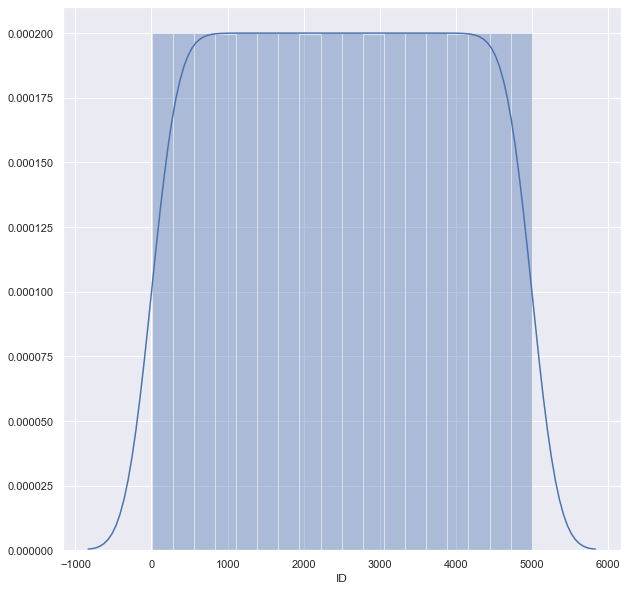

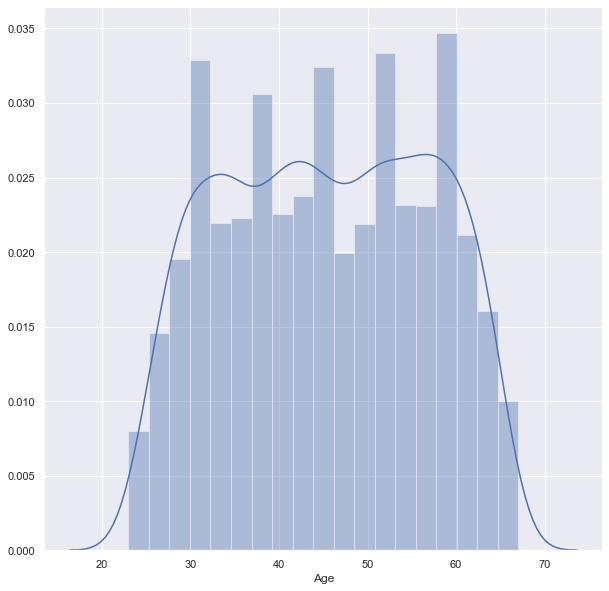

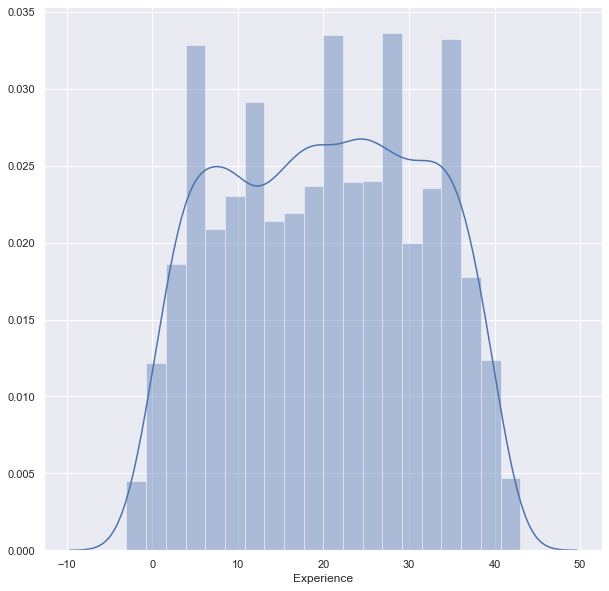

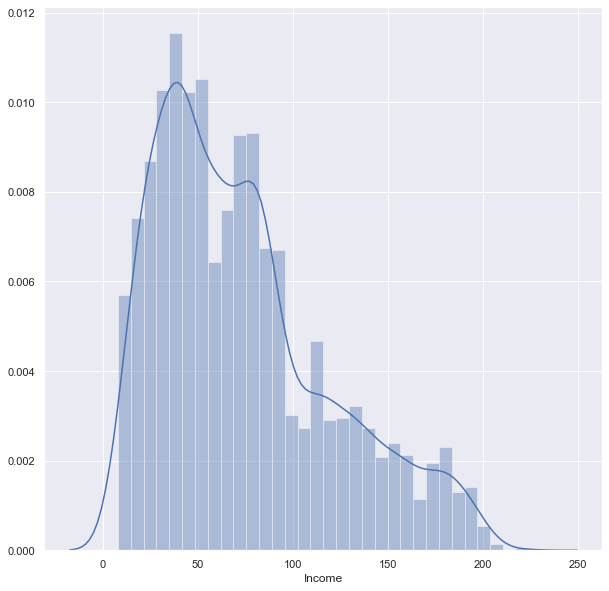

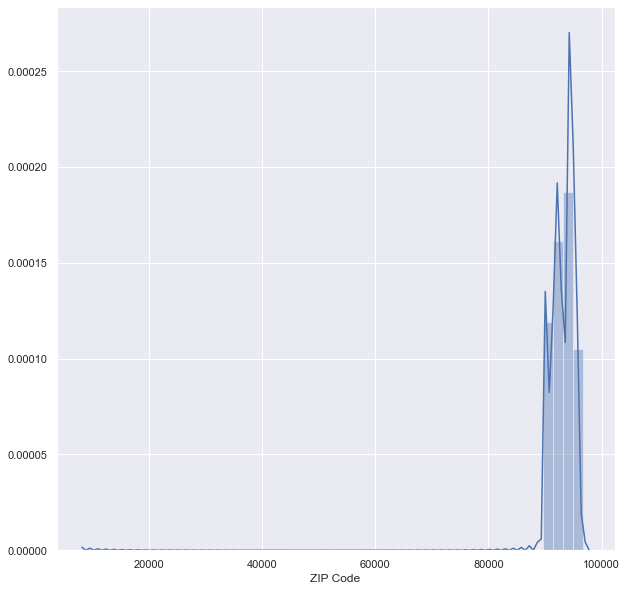

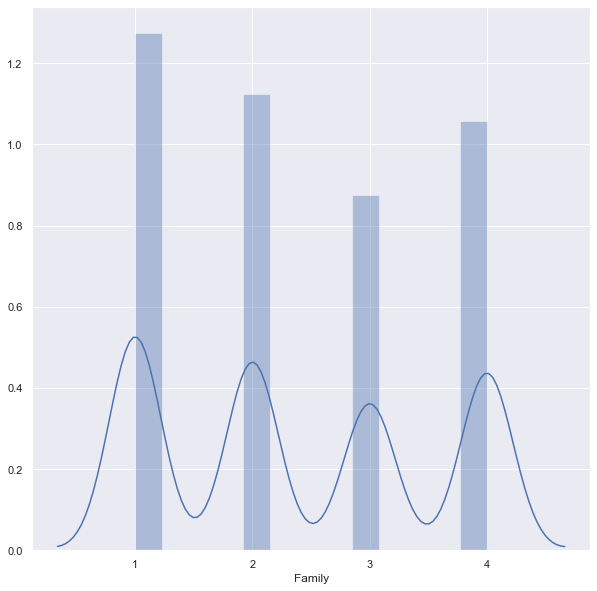

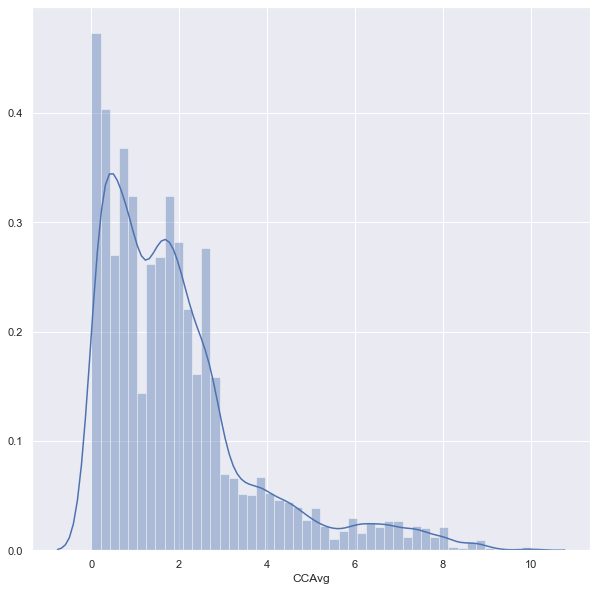

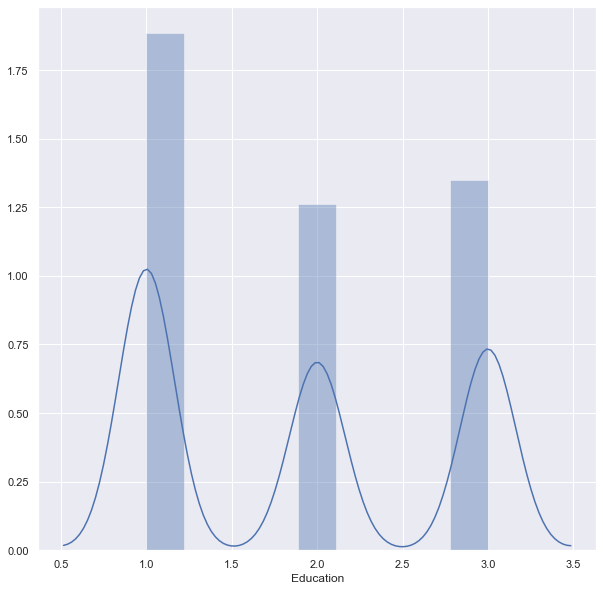

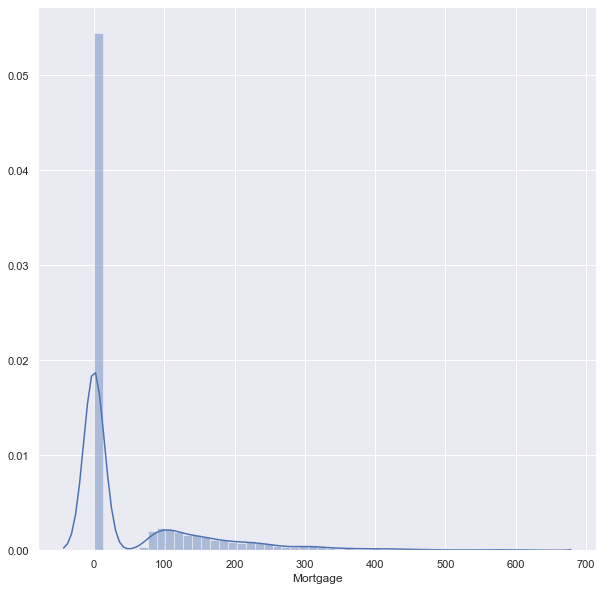

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


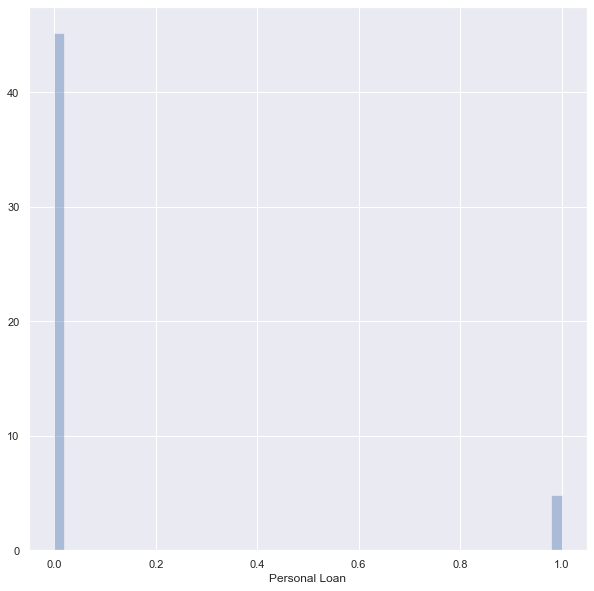

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


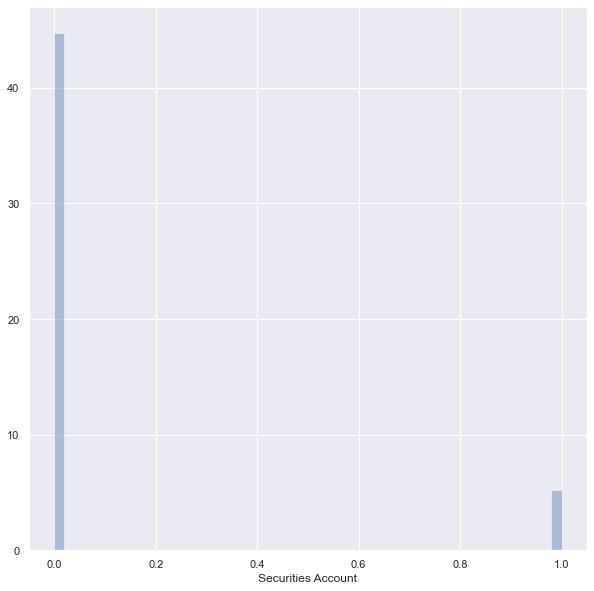

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


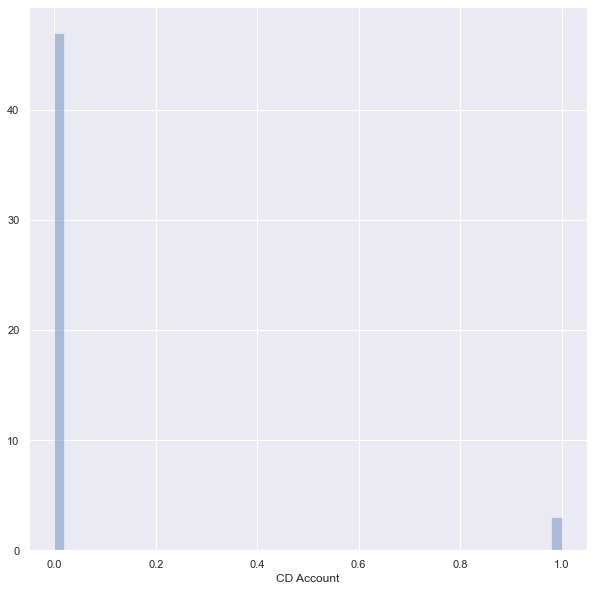

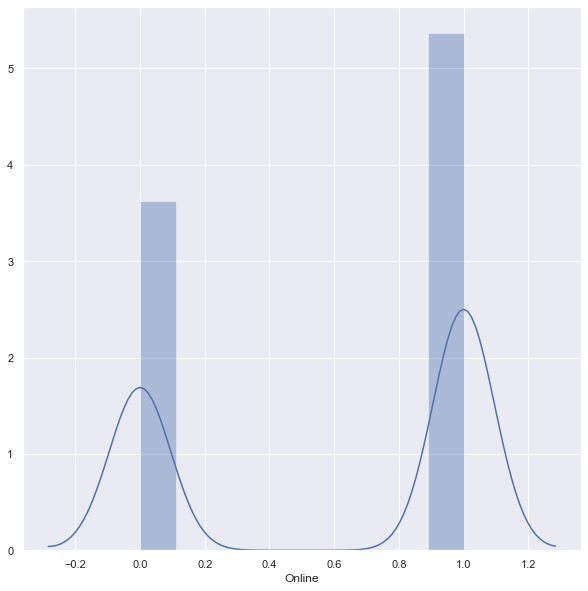

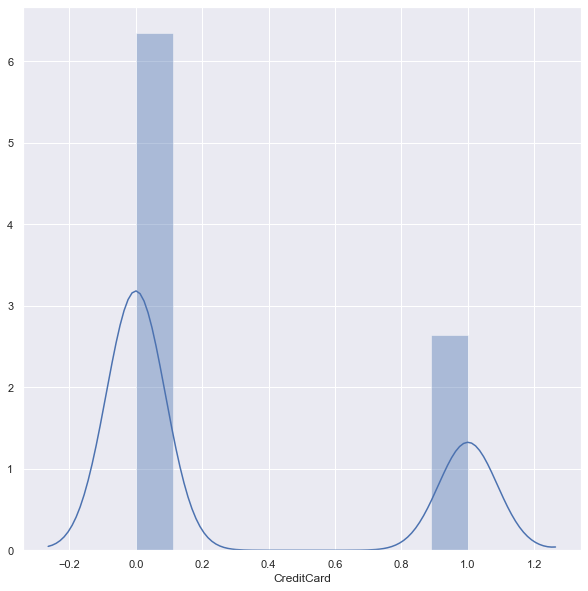

In [18]:
#univariate
# let us plot all the columns to look at their distributions

for i in df1.columns:
    plt.figure(figsize = (10,10))
    sns.distplot(df1[i])
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


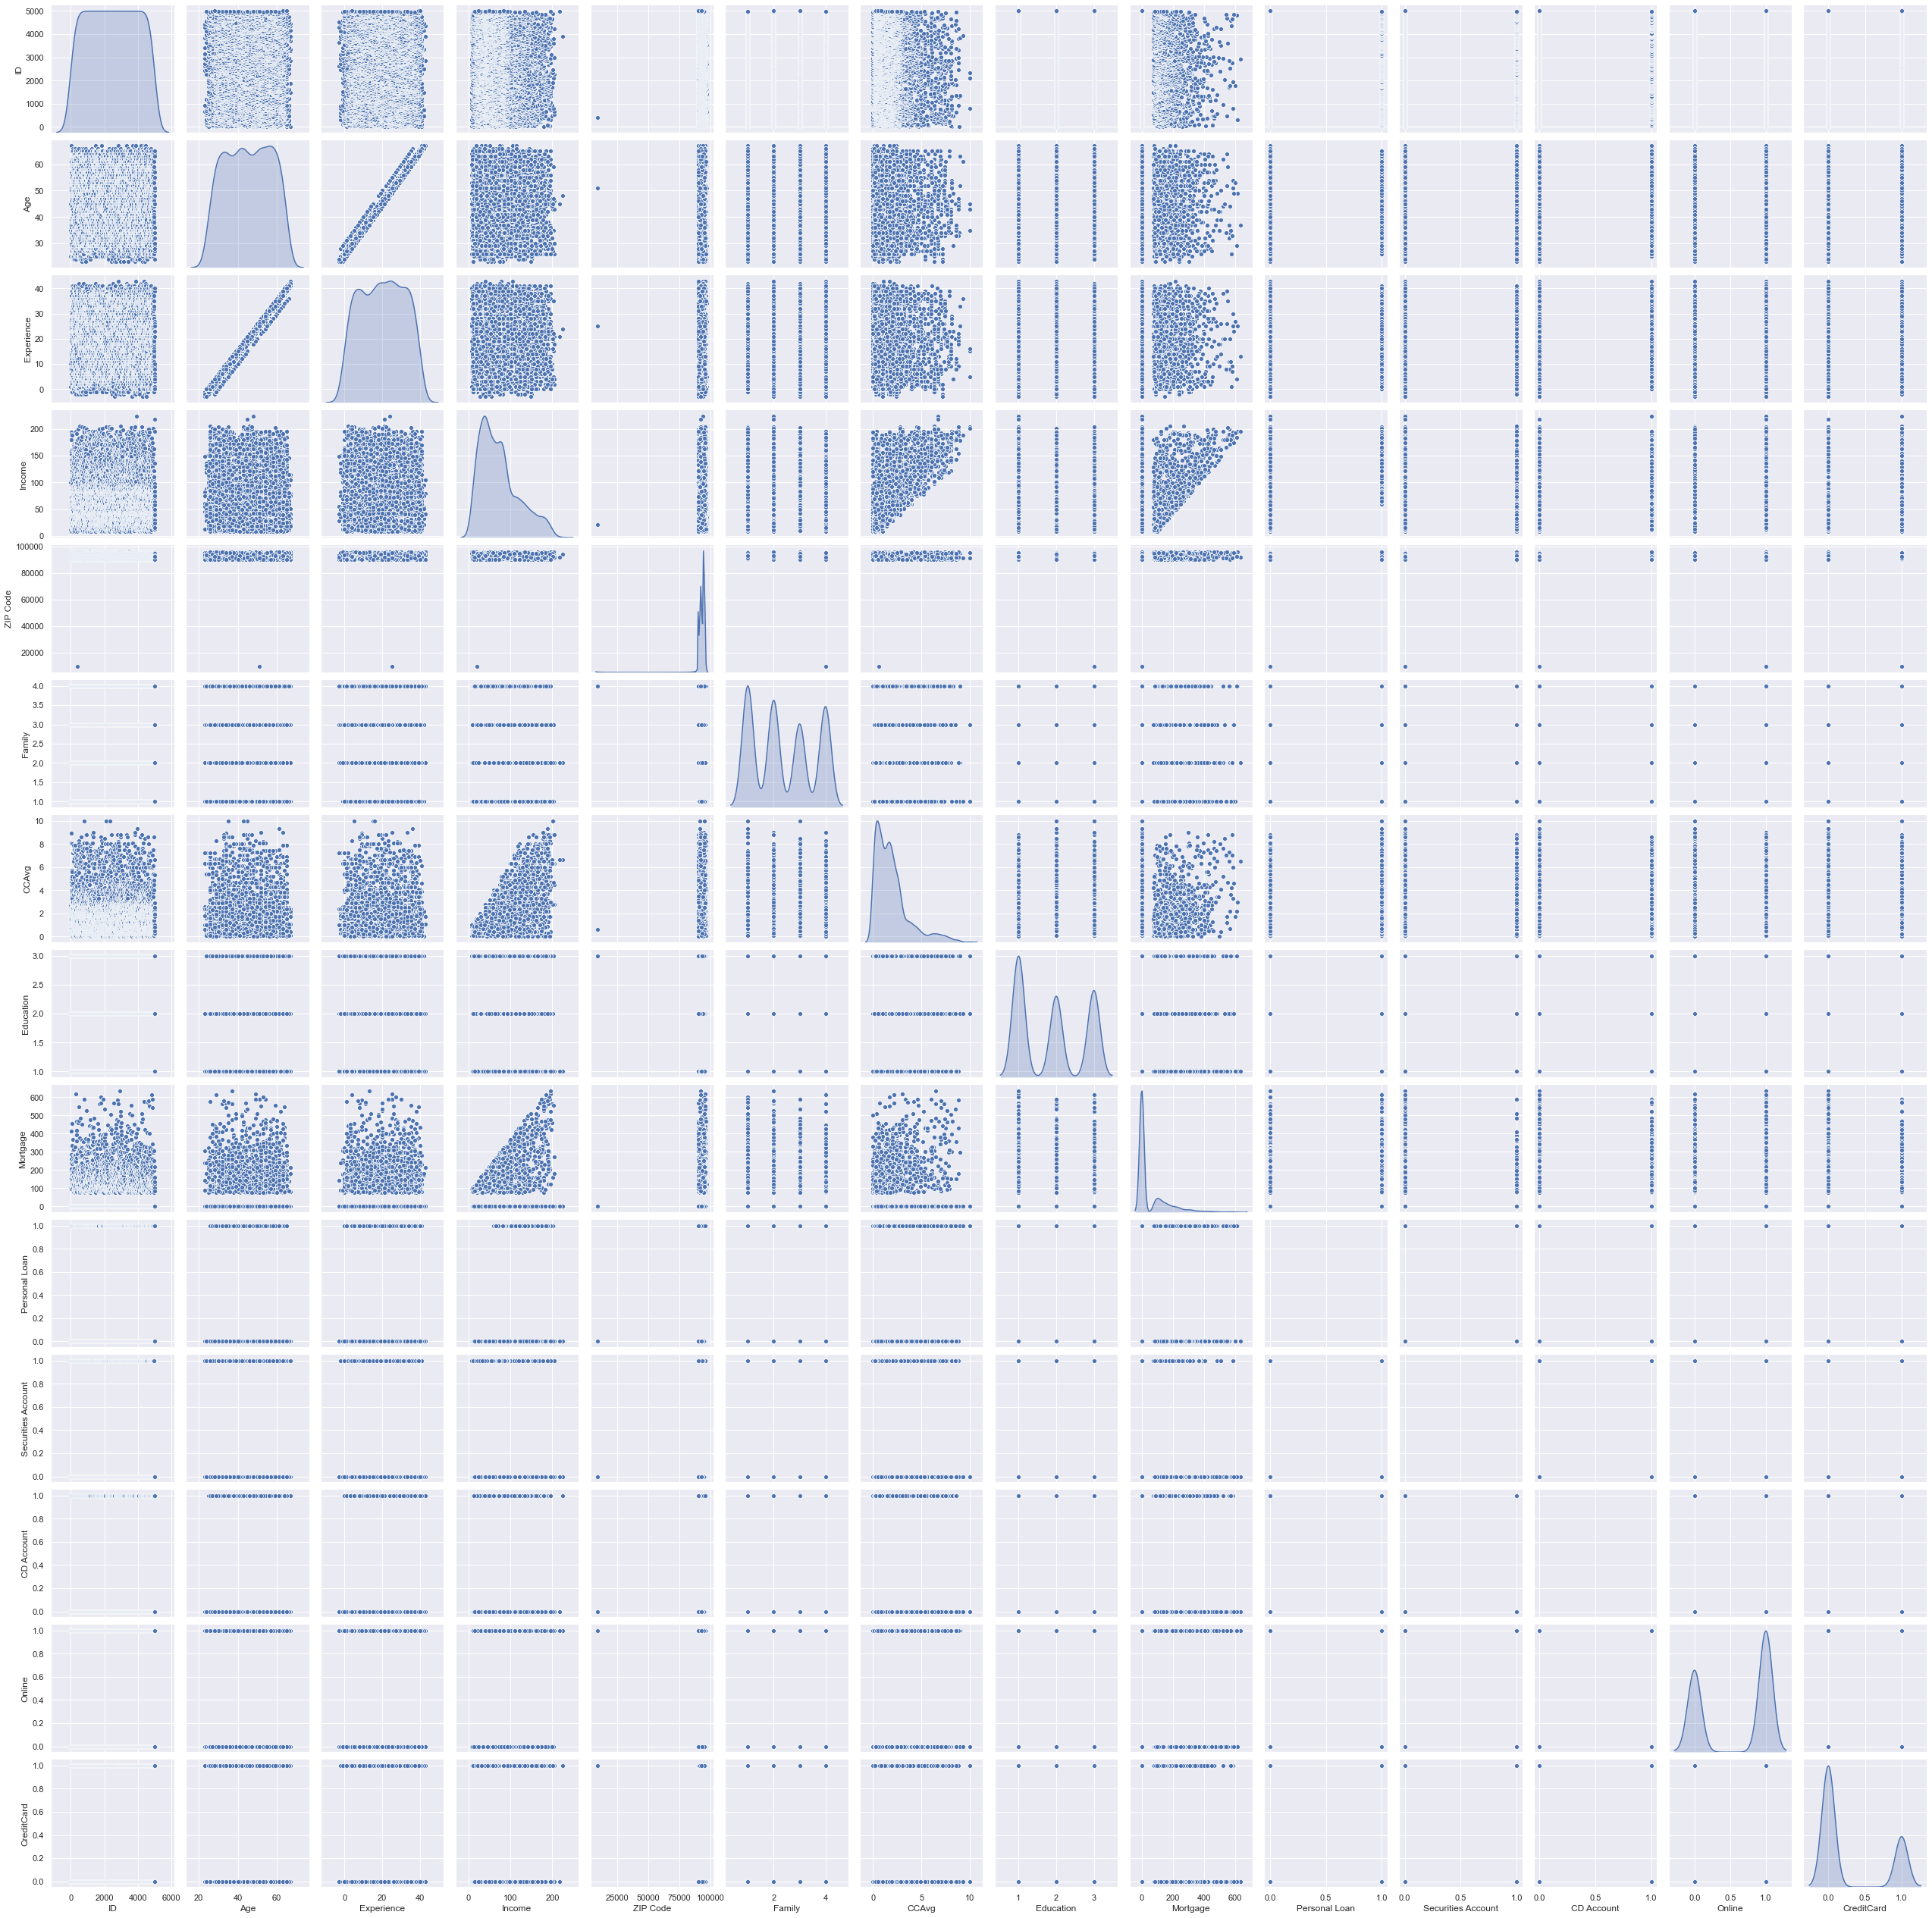

In [19]:
#bivariate
sns.pairplot(df1, diag_kind='kde')   # to plot density curve instead of histogram on the diag

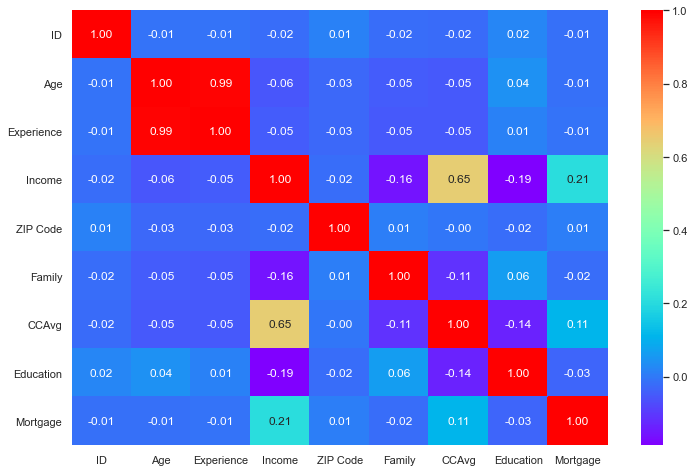

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [21]:

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['Age','Income']
imputer = rep_0.fit(df1[cols])
df1[cols] = imputer.transform(df1[cols])



df1.head(10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25.0,1,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45.0,19,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39.0,15,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8,45.0,91330,4,1.0,2,0,0,0,0,0,1
5,6,37.0,13,29.0,92121,4,0.4,2,155,0,0,0,1,0
6,7,53.0,27,72.0,91711,2,1.5,2,0,0,0,0,1,0
7,8,50.0,24,22.0,93943,1,0.3,3,0,0,0,0,0,1
8,9,35.0,10,81.0,90089,3,0.6,2,104,0,0,0,1,0
9,10,34.0,9,180.0,93023,1,8.9,3,0,1,0,0,0,0


In [22]:
df1[df1["Experience"]<0]=0
print(df1[df1["Experience"]==0].index)

Int64Index([  89,  105,  151,  155,  156,  160,  182,  226,  256,  315,
            ...
            4679, 4712, 4782, 4796, 4874, 4901, 4934, 4943, 4957, 4989],
           dtype='int64', length=118)


## Split the data into training and test set in the ratio of 70:30 respectively

In [23]:
# lets build our linear model
# independant variables
X = df1.drop(['Personal Loan','ID'], axis=1)
# the dependent variable
Y =df1['Personal Loan']

In [24]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
475,43.0,19,152.0,92008,3,6.1,2,0,0,0,0,0
1304,51.0,26,145.0,90025,1,8.1,1,397,0,0,0,1
2076,49.0,23,119.0,91030,1,7.3,1,398,0,0,0,0
2044,51.0,25,102.0,92677,1,0.3,1,0,0,0,1,0
4472,50.0,25,90.0,95616,1,2.8,2,0,0,0,1,0


In [26]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df1.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [27]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df1.loc[df1['Personal Loan'] == 1]), (len(df1.loc[df1['Personal Loan'] == 1])/len(df1.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df1.loc[df1['Personal Loan'] == 0]), (len(df1.loc[df1['Personal Loan'] == 0])/len(df1.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 333 (9.51%)
Training Personal Loan False Values   : 3167 (90.49%)

Test Personal Loan True Values        : 147 (9.80%)
Test Personal Loan False Values       : 1353 (90.20%)



In [28]:
#logistic regression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',random_state=9,max_iter=200)
logreg.fit(x_train, y_train)                    # fit the model on train data

LogisticRegression(max_iter=200, random_state=9)

In [29]:
y_predict = logreg.predict(x_test)    #predicted y

In [30]:
z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.tail()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status
1171,64.0,40,43.0,95014,1,1.9,2,0,0,0,1,0,0,0
4501,59.0,33,38.0,94132,3,2.2,3,178,1,1,1,1,0,0
3225,52.0,28,38.0,95064,4,0.9,2,0,0,0,0,1,0,0
1010,27.0,3,98.0,95616,2,2.5,1,361,1,1,1,1,0,0
3877,29.0,4,41.0,93105,1,1.0,1,0,0,0,0,0,0,0


In [31]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9408571428571428

Testing accuracy 0.94

Confusion Matrix


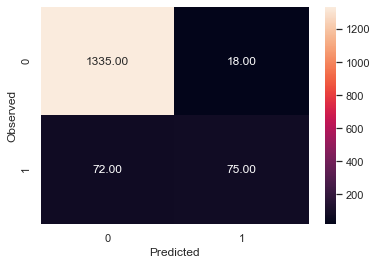

None

Recall: 0.5102040816326531

Precision: 0.8064516129032258

F1 Score: 0.625

Roc Auc Score: 0.7484501561156612


In [32]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

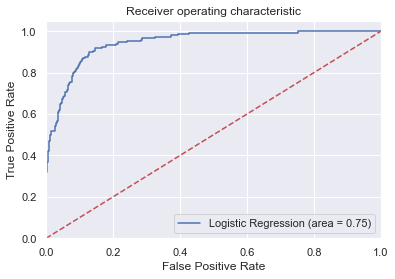

In [33]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
6,Education,1.01
4,Family,0.90
9,CD Account_1,0.29
5,CCAvg,0.27
0,Age,0.06
8,Securities Account_1,0.06
1,Experience,0.05
2,Income,0.04
11,CreditCard_1,0.03
10,Online_1,0.01


## <a id = "link8"></a>Business Insights 

*True Positive (observed=1,predicted=1):*

Predicted that customer will take loan (75.0)

*False Positive (observed=0,predicted=1):*

Predicted that customer will take loan but they are not eligible(18.0)

*True Negative (observed=0,predicted=0):*

Predicted that customer will not take loan(1335)

*False Negative (observed=1,predicted=0):*

Predicted the customer didn't take loan but they are eligible(72.0)

##### From the logistic model, the number of customers eligible who took personal loan is almost equal to the number of customers who didn't but still they are eligible. 

##### `Important Features`

#### Education and family of the customer is influencing the model's output and also by high value.(Based on the coefficients value). Rest others are also contributing to model's output but not as significant as education and family.